In [1]:
from mtri_gmsh_helpers import *
import numpy as np
import netCDF4 as nc

In [2]:
geometry_filename = "/users/hasanm4/lore.scorec.rpi.edu/wsources/readOH2csg/tests/assets/box_case/xgc_mesh/geometry.nc"

ds = nc.Dataset(geometry_filename)

# check if the `ncells` variable exists in the dataset and has value 46
assert 'ncells' in ds.variables, "Variable 'ncells' not found in dataset."
ncells_value = ds.variables['ncells'][:]
assert ncells_value == 40, f"Expected 'ncells' to be 40, but got {ncells_value}."

In [3]:
surface_coeffs = ds.variables['surface_coeffs'][:]
cells = ds.variables['cells'][:]
boundaries = ds.variables['boundaries'][:]
surface_points = ds.variables['surface_points'][:]
zone_centers = ds.variables['zone_center'][:]
zone_min = ds.variables['zone_min'][:]
zone_max = ds.variables['zone_max'][:]
surfaces = ds.variables['surfaces'][:]
neighbors = ds.variables['neighbors'][:]

ds.close()

surface_coeffs = np.array(surface_coeffs)
cells = np.array(cells)
boundaries = np.array(boundaries)
surface_points = np.array(surface_points)
zone_centers = np.array(zone_centers)
zone_min = np.array(zone_min)
zone_max = np.array(zone_max)
surfaces = np.array(surfaces)
neighbors = np.array(neighbors)

Test assertions

In [4]:
assert cells.shape[0] == ncells_value + 1, f"Expected cells shape[0] to be {ncells_value + 1}, but got {cells.shape[0]}."
assert surface_coeffs.shape[0] == np.max(np.abs(boundaries)), f"Expected surface_coeffs shape[0] to be {np.max(np.abs(boundaries))}, but got {surface_coeffs.shape[0]}."

In [5]:
mesh = load_triangulation('unique_triangulation.pkl')

Triangulation loaded from unique_triangulation.pkl


Cell 1 boundaries: [ 5  0  1 62 63] with signs [ 1 -1  1  1  1]


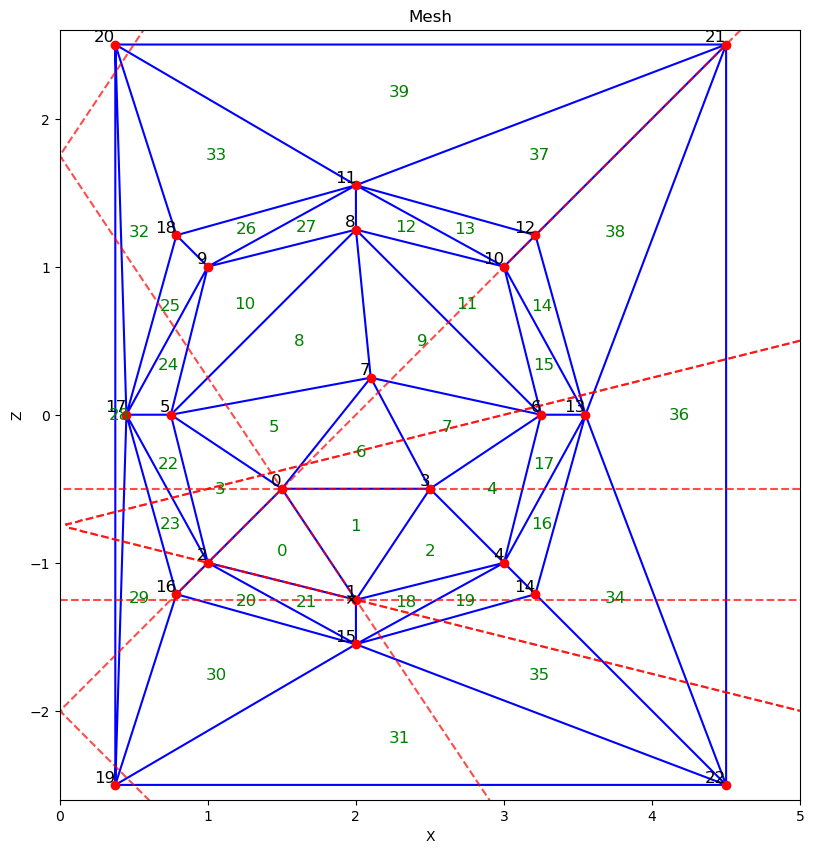

In [6]:
cell_id = 1
cell_boundary_ids, signs = get_cell_boundaries(cell_id, cells, boundaries)
print(f"Cell {cell_id} boundaries: {cell_boundary_ids} with signs {signs}")
fig, ax = plt.subplots()
plot_triangulation_with_labels(mesh, axis=ax)
for b_id in cell_boundary_ids:
    plot_quad_on_xz(surface_coeffs[b_id], (0,5), (-5,5), axis=ax)
    
plot_quad_on_xz(surface_coeffs[5], (0,5), (-5,5), axis=ax)

ax.plot(1.9695E+00, -1.2431E+00, 'kx', label='Cell Center')

flight_points = [
    [2.1353E+00, -1.1817E+00],
    [2.1288E+00, -1.2178E+00],
    [2.0768E+00, -1.5057E+00]
]
#ax.plot([pt[0] for pt in flight_points], [pt[1] for pt in flight_points], 'ro-', label='Flight Path')

ax.set_xlabel('X')
ax.set_ylabel('Z')
# equal axis scaling
ax.set_aspect('equal')
ax.set_xlim(0,5)
ax.set_ylim(-2.6,  2.6)
fig.set_size_inches(10, 10)
plt.show()

(array([3], dtype=int32), array([19], dtype=int32))


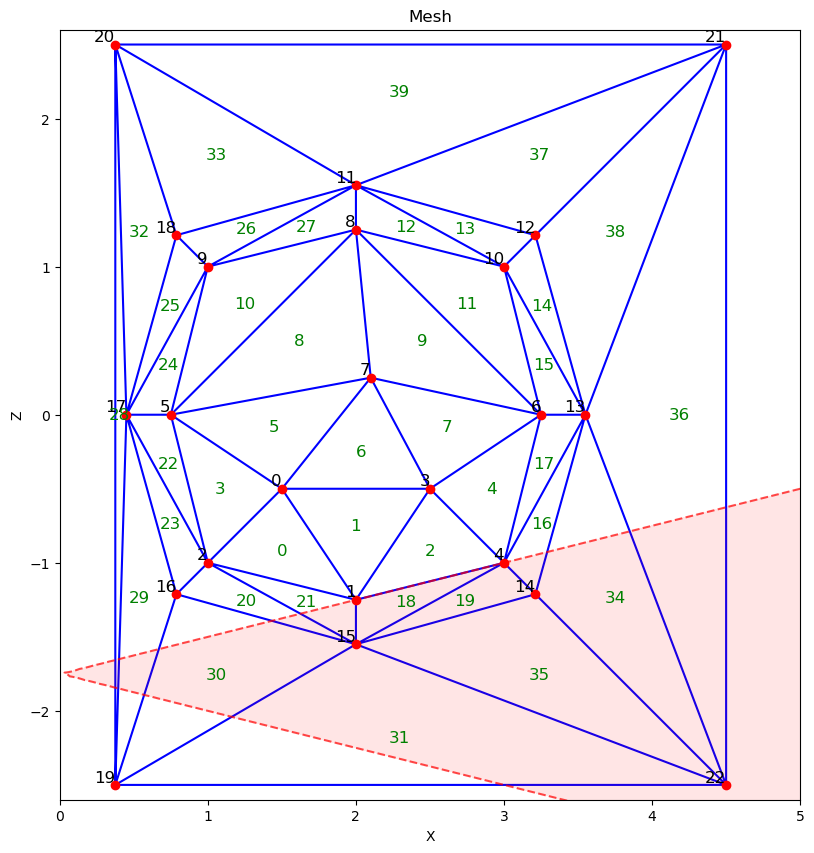

In [10]:
fig, ax = plt.subplots()
plot_triangulation_with_labels(mesh, axis=ax)

test_edge_id = 7
print(get_neighboring_cells(test_edge_id, surfaces, neighbors))
plot_quad_on_xz(surface_coeffs[test_edge_id], (0,5), (-5,5), axis=ax, sign=1)
    
#plot_quad_on_xz(surface_coeffs[12], (0,5), (-5,5))
ax.set_xlabel('X')
ax.set_ylabel('Z')
# equal axis scaling
ax.set_aspect('equal')
ax.set_xlim(0,5)
ax.set_ylim(-2.6,  2.6)
fig.set_size_inches(10, 10)
plt.show()

```text
 37 @m zn_type_max 4
 38 @m zn_undefined 0
 39 @m zn_vacuum 1
 40 @m zn_plasma 2
 41 @m zn_solid 3
 42 @m zn_exit 4
 ```

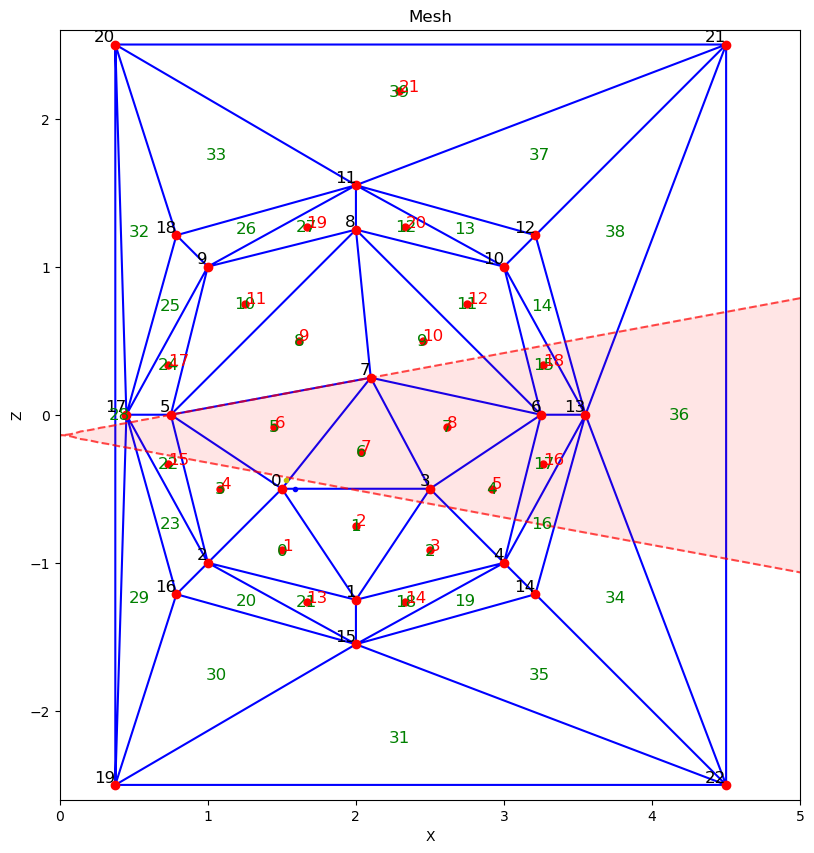

In [56]:
# plot zone centers
fig, ax = plt.subplots()
plot_triangulation_with_labels(mesh, axis=ax)

# print zone ids
for i, (x, z) in enumerate(zone_centers[:, [0, 2]]):
    ax.text(x, z, str(i+1), color='red', fontsize=12)

# plot dot at zone centers
ax.plot(zone_centers[:, 0], zone_centers[:, 2], 'ro', markersize=5)

test_sufaces, test_signs = get_cell_boundaries(6, cells, boundaries)
for s_id, sign in zip(test_sufaces[2:3], test_signs[2:3]):
    plot_quad_on_xz(surface_coeffs[s_id], (0,5), (-5,5), axis=ax, sign=sign)

# zone_box_id = 14
# # plot zone bounding box wth a rectangle
# ax.plot([zone_min[zone_box_id, 0], zone_max[zone_box_id, 0], zone_max[zone_box_id, 0], zone_min[zone_box_id, 0], zone_min[zone_box_id, 0]],
#         [zone_min[zone_box_id, 2], zone_min[zone_box_id, 2], zone_max[zone_box_id, 2], zone_max[zone_box_id, 2], zone_min[zone_box_id, 2]], 'g-', linewidth=2)

# ray = [
#     [1.2441E+00, -8.5043E-01],
#     [1.2378E+00, -5.3862E-01],
#     [1.2366346453230284, -0.48322206530761663]
# ]
# ax.plot(ray[0][0], ray[0][1], 'b.')
# ax.plot(ray[1][0], ray[1][1], 'y.')
# ax.plot(ray[2][0], ray[2][1], 'k.')

# ray2 = [[1.7738269636498416,  -1.1934567409124603]]
# ax.plot(ray2[0][0], ray2[0][1], 'mx')

currnt_pos = [1.5886297528743945,  -0.50000000000000000]
new_pos = [1.5256223061464875, -0.43767962748801786]
ax.plot(currnt_pos[0], currnt_pos[1], 'b.')
ax.plot(new_pos[0], new_pos[1], 'y.')


ax.set_xlabel('X')
ax.set_ylabel('Z')
# equal axis scaling
ax.set_aspect('equal')
ax.set_xlim(0,5)
ax.set_ylim(-2.6,  2.6)
fig.set_size_inches(10, 10)
plt.show()

In [50]:
get_cell_boundaries(6, cells, boundaries)

(array([ 3,  4, 20, 72, 73], dtype=int32),
 array([ 1, -1,  1,  1,  1], dtype=int32))

In [ ]:
surfaces[3][]

array([[7, 6],
       [1, 1]], dtype=int32)

Assertion failed (flight.web): (zn_type(lc_zone(pt_loc(fl_origin(fx))))==zn_vacuum)||(zn_type(lc_zone(pt_loc(fl_origin(fx))))==zn_plasma)